In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
import kpp4py

In [3]:
?kpp4py.onestep

Call signature: kpp4py.onestep(*args, **kwargs)
Type:           fortran
String form:    <fortran object>
Docstring:     
all_c_after = onestep(all_c_before,all_phy,all_photol,[n_sample])

Wrapper for ``onestep``.

Parameters
----------
all_c_before : input rank-2 array('d') with bounds (240,n_sample)
all_phy : input rank-2 array('d') with bounds (4,n_sample)
all_photol : input rank-2 array('d') with bounds (130,n_sample)

Other Parameters
----------------
n_sample : input int, optional
    Default: shape(all_c_before,1)

Returns
-------
all_c_after : rank-2 array('d') with bounds (240,n_sample)


In [4]:
ds = xr.open_dataset('KPP_fields.nc')
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240)
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact, nspec
Data variables:
    C_before  (lev, lat, lon, nspec) float64 ...
    C_after   (lev, lat, lon, nspec) float64 ...
    PHOTOL    (lev, lat, lon, nphotol) float64 ...
    PHY       (lev, lat, lon, nphy) float64 ...
    RCONST    (lev, lat, lon, nreact) float64 ...

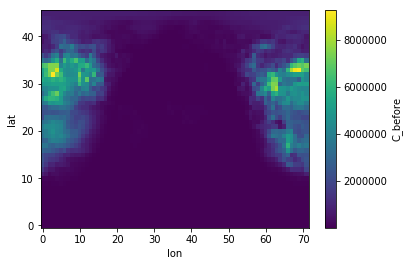

In [5]:
ds['C_before'][0,...,233].plot()

In [6]:
ds_sub = ds.isel(lev=0, lat=30, lon=slice(0,10))

In [7]:
ds_sub = ds.isel(lev=0, lat=30, lon=slice(0,10))

all_c_before = ds_sub['C_before'].values
all_phy = ds_sub['PHY'].values
all_photol = ds_sub['PHOTOL'].values

all_c_after_true = ds_sub['C_after'].values # for verification

In [11]:
all_c_after = kpp4py.onestep(all_c_before.T, all_phy.T, all_photol.T).T
all_c_after.shape

(10, 240)

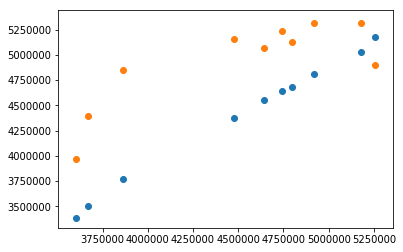

In [12]:
plt.scatter(all_c_after[:,233], all_c_after_true[:,233])
plt.scatter(all_c_after[:,233], all_c_before[:,233])